In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
with open('One.txt') as file:
    a=file.readlines()
print(a)


['This is a story about dogs\n', 'our canine pets\n', 'Dogs are furry animals\n']


In [3]:
with open('One.txt') as file:
    a=file.read().lower().split()
a

['this',
 'is',
 'a',
 'story',
 'about',
 'dogs',
 'our',
 'canine',
 'pets',
 'dogs',
 'are',
 'furry',
 'animals']

In [4]:
uni_words=set(a)
uni_words

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'dogs',
 'furry',
 'is',
 'our',
 'pets',
 'story',
 'this'}

In [5]:
with open('Two.txt') as file1:
    words_1=file1.read().lower().split()
uni_words_1=set(words_1)

In [6]:
uni_words_1

{'a',
 'about',
 'catching',
 'fun',
 'is',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [7]:
all_uni_words=set()
all_uni_words.update(uni_words)
all_uni_words.update(uni_words_1)


In [8]:
all_uni_words

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'catching',
 'dogs',
 'fun',
 'furry',
 'is',
 'our',
 'pets',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [9]:
full_vocab=dict()
i=0
for word in all_uni_words:
    full_vocab[word]=i
    i=i+1

In [10]:
full_vocab

{'animals': 0,
 'about': 1,
 'dogs': 2,
 'furry': 3,
 'waves': 4,
 'pets': 5,
 'surfing': 6,
 'water': 7,
 'story': 8,
 'is': 9,
 'catching': 10,
 'popular': 11,
 'are': 12,
 'canine': 13,
 'sport': 14,
 'a': 15,
 'fun': 16,
 'this': 17,
 'our': 18}

In [11]:
one_freq=[0]*len(full_vocab)
two_freq=[0]*len(full_vocab)
all_words=['']*len(full_vocab)

In [12]:
for word in full_vocab:
    word_index=full_vocab[word]
    all_words[word_index]=word
all_words

['animals',
 'about',
 'dogs',
 'furry',
 'waves',
 'pets',
 'surfing',
 'water',
 'story',
 'is',
 'catching',
 'popular',
 'are',
 'canine',
 'sport',
 'a',
 'fun',
 'this',
 'our']

In [13]:
# for word in full_vocab:
#     word_index=full_vocab[word]

with open('One.txt') as file:
    one_text=file.read().lower().split()

for word in one_text:
    word_index=full_vocab[word]
    one_freq[word_index]+=1     

In [14]:
# for word in full_vocab:
#     word_index=full_vocab[word]

with open('two.txt') as file:
    two_text=file.read().lower().split()

for word in two_text:
    word_index=full_vocab[word]
    two_freq[word_index]+=1     

In [15]:
two_freq

[0, 1, 0, 0, 1, 0, 2, 1, 1, 3, 1, 1, 0, 0, 1, 1, 1, 1, 0]

In [16]:
bow=pd.DataFrame(data=[one_freq,two_freq],columns=all_words)

### using sklearn


In [17]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer

In [18]:
text=[
    'this is amazing',
    'this is not so amazing'
    'completely outstandingly amazing'
]

In [19]:
cv=CountVectorizer()

In [20]:
sparse_matrix=cv.fit_transform(text)

In [21]:
sparse_matrix.todense()

matrix([[1, 0, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1]], dtype=int64)

In [22]:
tfid=TfidfTransformer()

In [23]:
sp=tfid.fit_transform(sparse_matrix)

In [24]:
sp.todense()

matrix([[0.57735027, 0.        , 0.57735027, 0.        , 0.        ,
         0.        , 0.57735027],
        [0.30287281, 0.42567716, 0.30287281, 0.42567716, 0.42567716,
         0.42567716, 0.30287281]])

In [25]:
tv=TfidfVectorizer()

In [26]:
sm=tv.fit_transform(text)

In [27]:
sm.todense()

matrix([[0.57735027, 0.        , 0.57735027, 0.        , 0.        ,
         0.        , 0.57735027],
        [0.30287281, 0.42567716, 0.30287281, 0.42567716, 0.42567716,
         0.42567716, 0.30287281]])

In [28]:
df=pd.read_csv('../DATA/airline_tweets.csv')

In [29]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [30]:
# df=df.dropna()

<Axes: xlabel='airline', ylabel='count'>

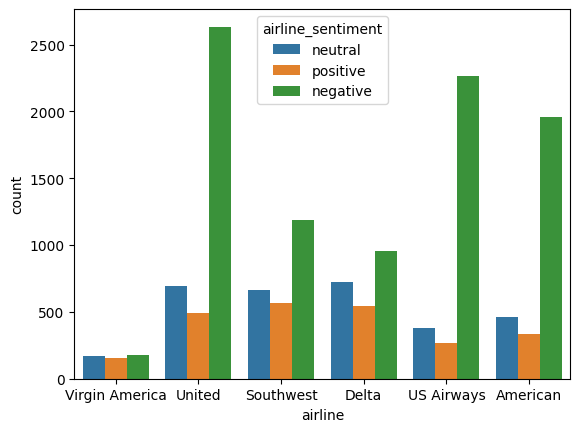

In [31]:
sns.countplot(data=df,x='airline',hue='airline_sentiment')

<Axes: xlabel='airline_sentiment', ylabel='count'>

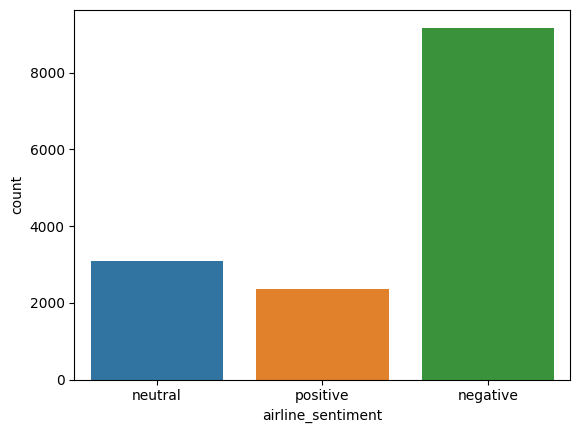

In [32]:
sns.countplot(data=df,x='airline_sentiment')

In [33]:
data=df[['airline_sentiment','text']]

In [34]:
X=data['text']
y=data['airline_sentiment']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
tfidf=TfidfVectorizer(stop_words='english')

In [39]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [40]:
X_train_tfidf=tfidf.transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

In [41]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [42]:
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [43]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train,)

LogisticRegression(max_iter=1000)

In [44]:
from sklearn.svm import SVC

In [45]:
svc=SVC()
svc.fit(X_train_tfidf,y_train)

SVC()

In [49]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [54]:
def prediction_of_model(model):
    preds=model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    cm=confusion_matrix(preds,y_test)
    cmd=ConfusionMatrixDisplay(cm)
    cmd.plot()


              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      1817
     neutral       0.67      0.41      0.51       628
    positive       0.81      0.56      0.66       483

    accuracy                           0.77      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928



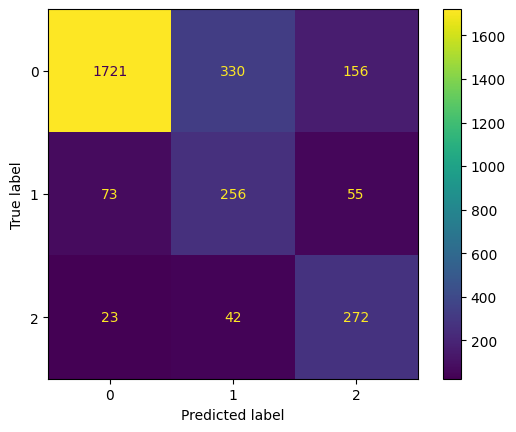

In [55]:
prediction_of_model(svc)

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.82      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



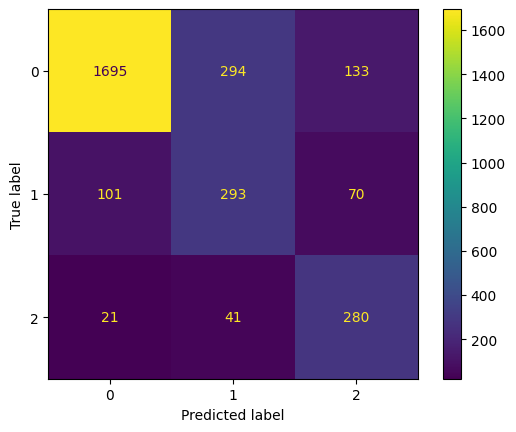

In [56]:
prediction_of_model(log)

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



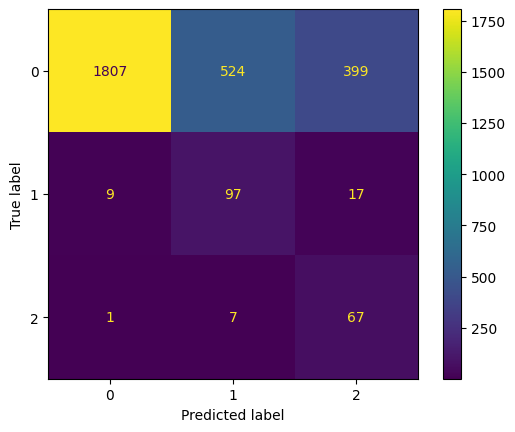

In [57]:
prediction_of_model(nb)